## Import Library

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None)  # Show full content in each cell
pd.set_option('display.width', 1000)  # Set max width

## Import dataset

In [2]:
dataset_path = os.getcwd().replace('/notebook' , '') + "/dataset/"

# Read training data
imu_df = pd.read_csv(dataset_path + "imu_data_v2.csv")
imu_df = imu_df.iloc[:,1:]
imu_df.columns = imu_df.columns.str.replace("'" , "")

# Feature Selection

Activity Mapper:

0 : walking
1 : jogging
2 : upstairs
3 : downstairs
4 : sitting
5 : standing
6 : sleeping

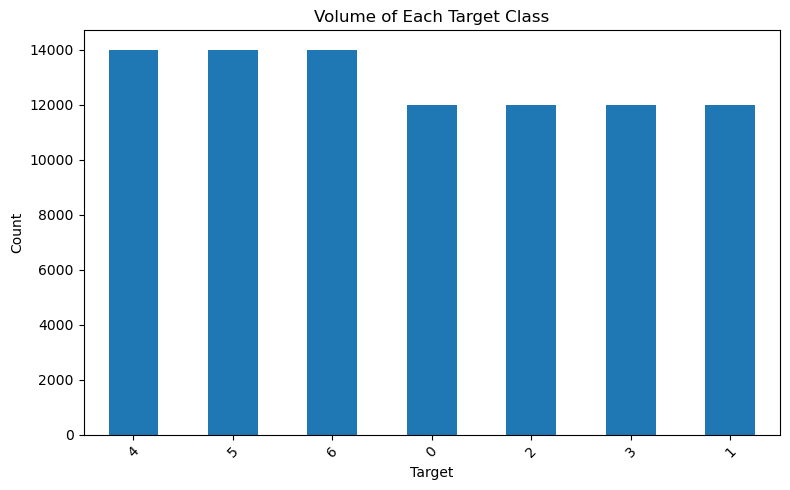

In [3]:
target_counts = imu_df['Target'].value_counts()
target_counts.plot(kind='bar', figsize=(8, 5))

plt.title('Volume of Each Target Class')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Correlation Matrix

## IMU Data

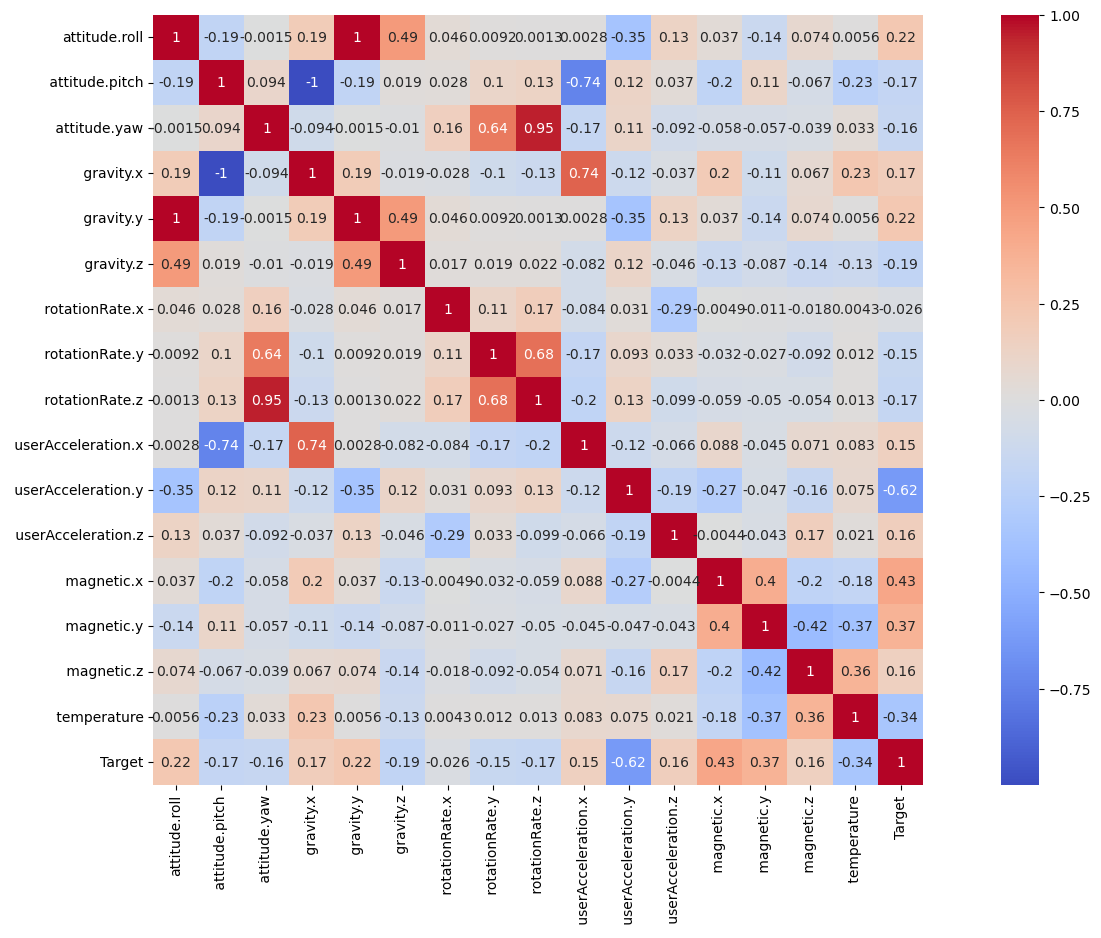

In [4]:
plt.figure(figsize = (20,10))

imu_corr = imu_df.corr()

axis_corr = sns.heatmap(imu_corr, annot= True,cmap="coolwarm",square=True)

plt.show()


In [5]:
target_corr = imu_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 userAcceleration.y    0.621876
 magnetic.x            0.430392
 magnetic.y            0.365150
 temperature           0.337499
 gravity.y             0.221778
attitude.roll          0.221753
 gravity.z             0.192234
 gravity.x             0.174785
 attitude.pitch        0.174784
 rotationRate.z        0.171019
 userAcceleration.z    0.164868
 attitude.yaw          0.160724
 magnetic.z            0.155906
 userAcceleration.x    0.154264
 rotationRate.y        0.151379
 rotationRate.x        0.025805
Name: Target, dtype: float64


Important Features = [attitude.roll , gravity.y , acceleration.x , acceleration.z]

## Motion EDA

In [6]:
"""
Map
0 - steady motion,
1 - unsteady motion
"""
mapper = {
    0 : 1,
    1 : 1,
    2 : 1,
    3 : 1,
    4 : 0,
    5 : 0,
    6 : 0
}

In [7]:
motion_df = imu_df.copy()
motion_df['Target'] = motion_df['Target'].map(mapper)

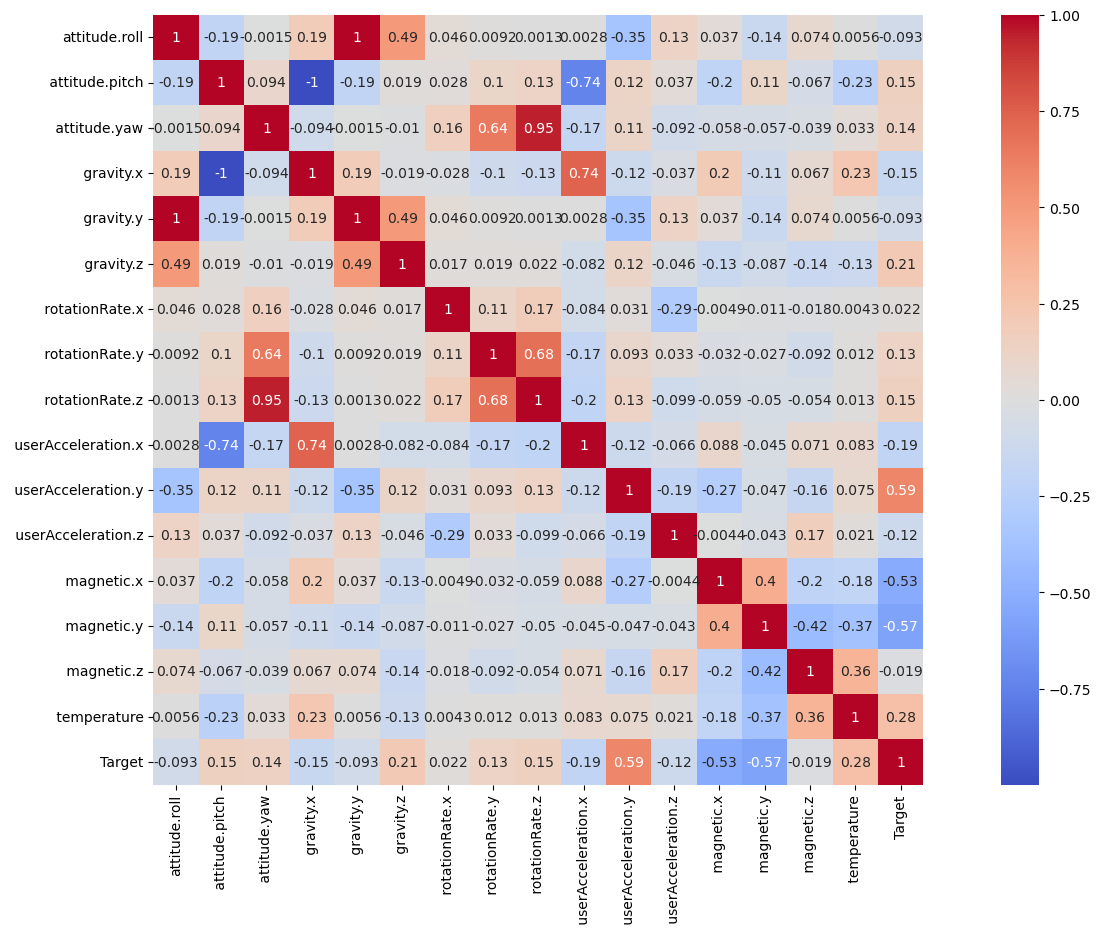

In [8]:
plt.figure(figsize = (20,10))

motion_corr = motion_df.corr()

axis_corr = sns.heatmap(motion_corr, annot= True,cmap="coolwarm",square=True)

plt.show()


In [9]:
target_corr = motion_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 userAcceleration.y    0.587252
 magnetic.y            0.574357
 magnetic.x            0.530972
 temperature           0.279630
 gravity.z             0.211894
 userAcceleration.x    0.192439
 rotationRate.z        0.151070
 gravity.x             0.150863
 attitude.pitch        0.150862
 attitude.yaw          0.141143
 rotationRate.y        0.131497
 userAcceleration.z    0.118321
 gravity.y             0.092927
attitude.roll          0.092908
 rotationRate.x        0.021588
 magnetic.z            0.018830
Name: Target, dtype: float64


Important Features = [attitude.roll , gravity.y , acceleration.z]

## Steady Motion

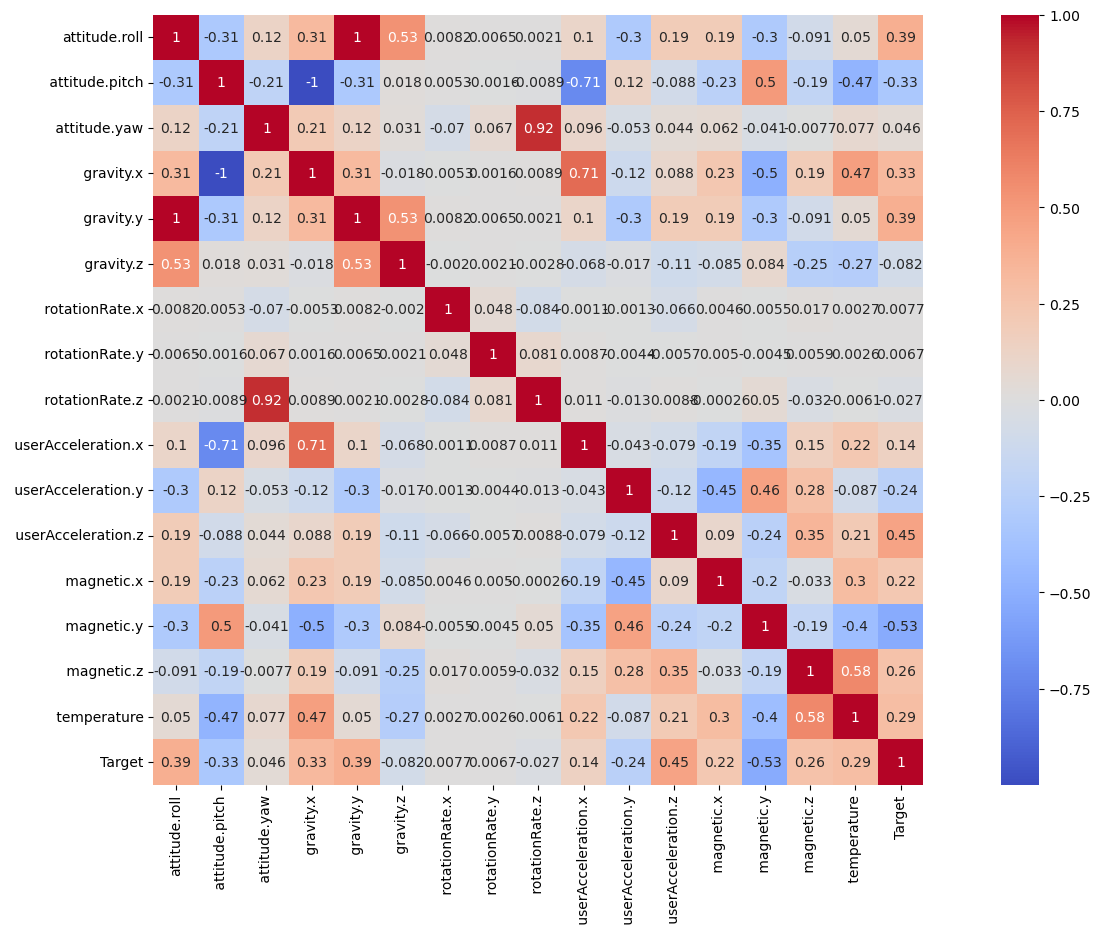

In [10]:
steady_df  =imu_df[(imu_df['Target'] == 4) | (imu_df['Target'] == 5) | (imu_df['Target'] == 6)]

plt.figure(figsize = (20,10))

steady_corr = steady_df.corr()

axis_corr = sns.heatmap(steady_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [11]:
target_corr = steady_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 magnetic.y            0.525749
 userAcceleration.z    0.445787
 gravity.y             0.386054
attitude.roll          0.386029
 gravity.x             0.326412
 attitude.pitch        0.326410
 temperature           0.291481
 magnetic.z            0.263086
 userAcceleration.y    0.236275
 magnetic.x            0.223794
 userAcceleration.x    0.142281
 gravity.z             0.082384
 attitude.yaw          0.045941
 rotationRate.z        0.027197
 rotationRate.x        0.007687
 rotationRate.y        0.006747
Name: Target, dtype: float64


Important Feature = [attitude.roll , attitude.pitch , gravity.x , gravity.y , gravity.z]

## Unsteady Motion

In [12]:
"""
Map
0 - surface motion,
1 - staircase motion
"""
mapper = {
    0 : 0,
    1 : 0,
    2 : 1,
    3 : 1
}

unsteady_df  = imu_df[(imu_df['Target'] != 4) & (imu_df['Target'] != 5) & (imu_df['Target'] != 6)]
unsteady_df['Target'] = unsteady_df['Target'].map(mapper)

/var/folders/4f/fqrnlkmx3jl8cj0wlvcm9rgw0000gn/T/ipykernel_1253/2288060464.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsteady_df['Target'] = unsteady_df['Target'].map(mapper)


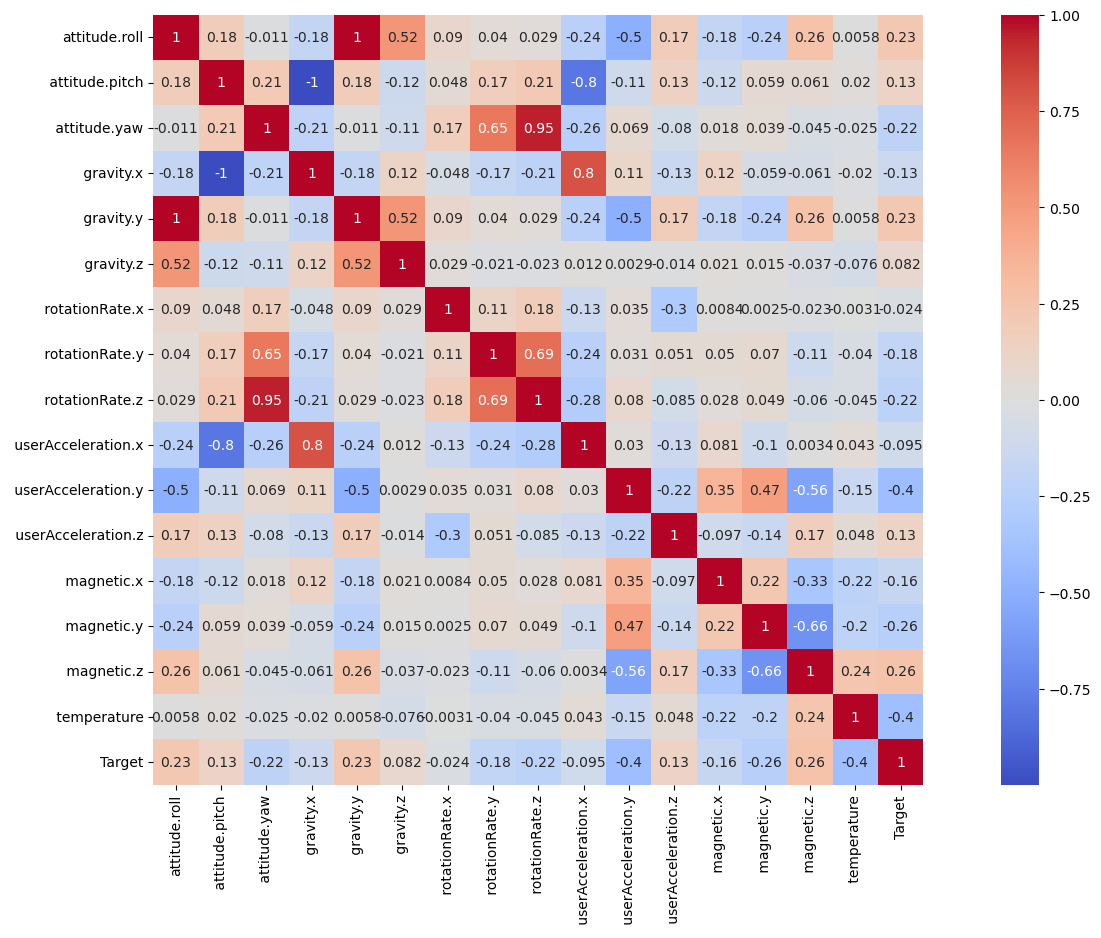

In [13]:
plt.figure(figsize = (20,10))

unsteady_corr = unsteady_df.corr()

axis_corr = sns.heatmap(unsteady_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [14]:
target_corr = unsteady_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 userAcceleration.y    0.399000
 temperature           0.397601
 magnetic.z            0.258267
 magnetic.y            0.257763
 gravity.y             0.226555
attitude.roll          0.226545
 rotationRate.z        0.220425
 attitude.yaw          0.217660
 rotationRate.y        0.183449
 magnetic.x            0.159119
 userAcceleration.z    0.131644
 gravity.x             0.129556
 attitude.pitch        0.129555
 userAcceleration.x    0.095103
 gravity.z             0.082110
 rotationRate.x        0.023684
Name: Target, dtype: float64


## Staircase Motion

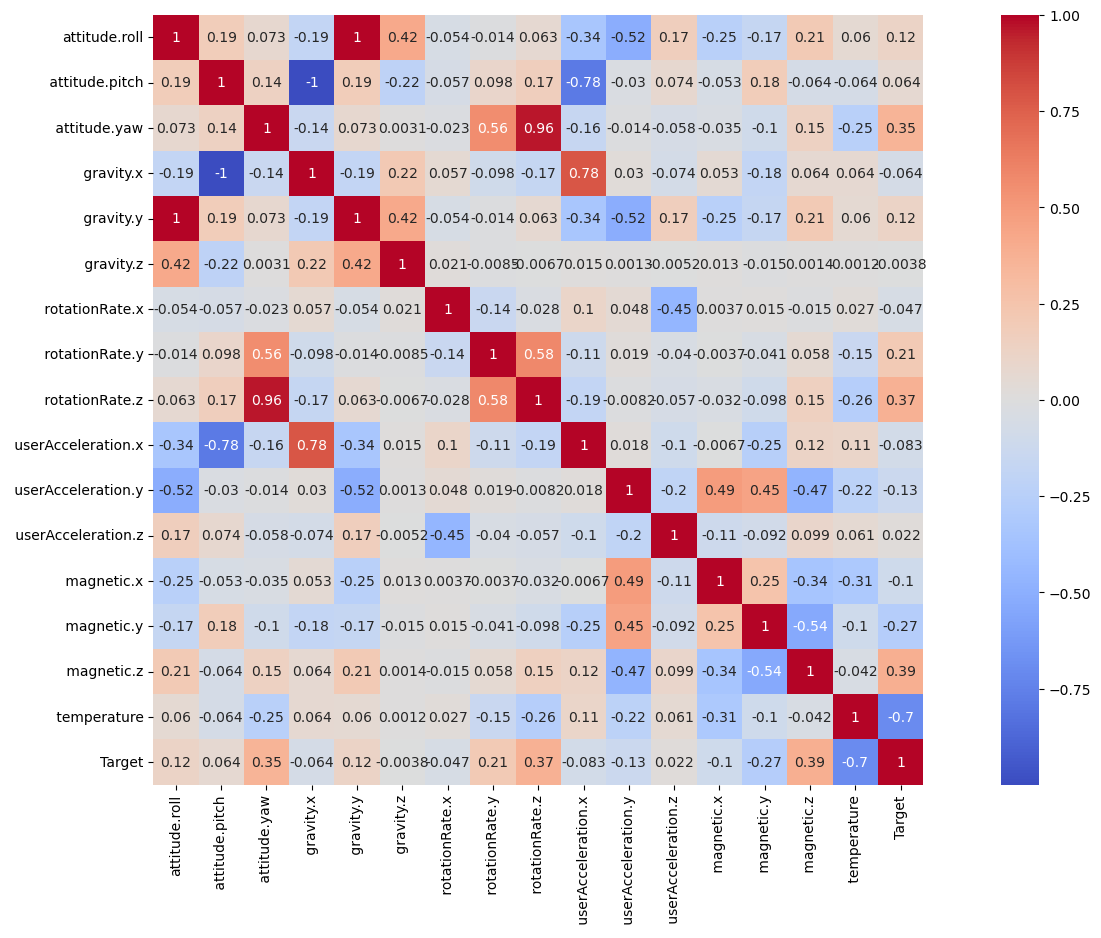

In [15]:
staircase_df  = imu_df[(imu_df['Target'] == 2) | (imu_df['Target'] == 3)]

plt.figure(figsize = (20,10))

staircase_corr = staircase_df.corr()

axis_corr = sns.heatmap(staircase_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [16]:
target_corr = staircase_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 temperature           0.696378
 magnetic.z            0.389864
 rotationRate.z        0.367408
 attitude.yaw          0.353108
 magnetic.y            0.266075
 rotationRate.y        0.206424
 userAcceleration.y    0.126975
 gravity.y             0.117834
attitude.roll          0.117829
 magnetic.x            0.104192
 userAcceleration.x    0.082972
 gravity.x             0.063614
 attitude.pitch        0.063613
 rotationRate.x        0.047234
 userAcceleration.z    0.021580
 gravity.z             0.003805
Name: Target, dtype: float64


## Surface Motion

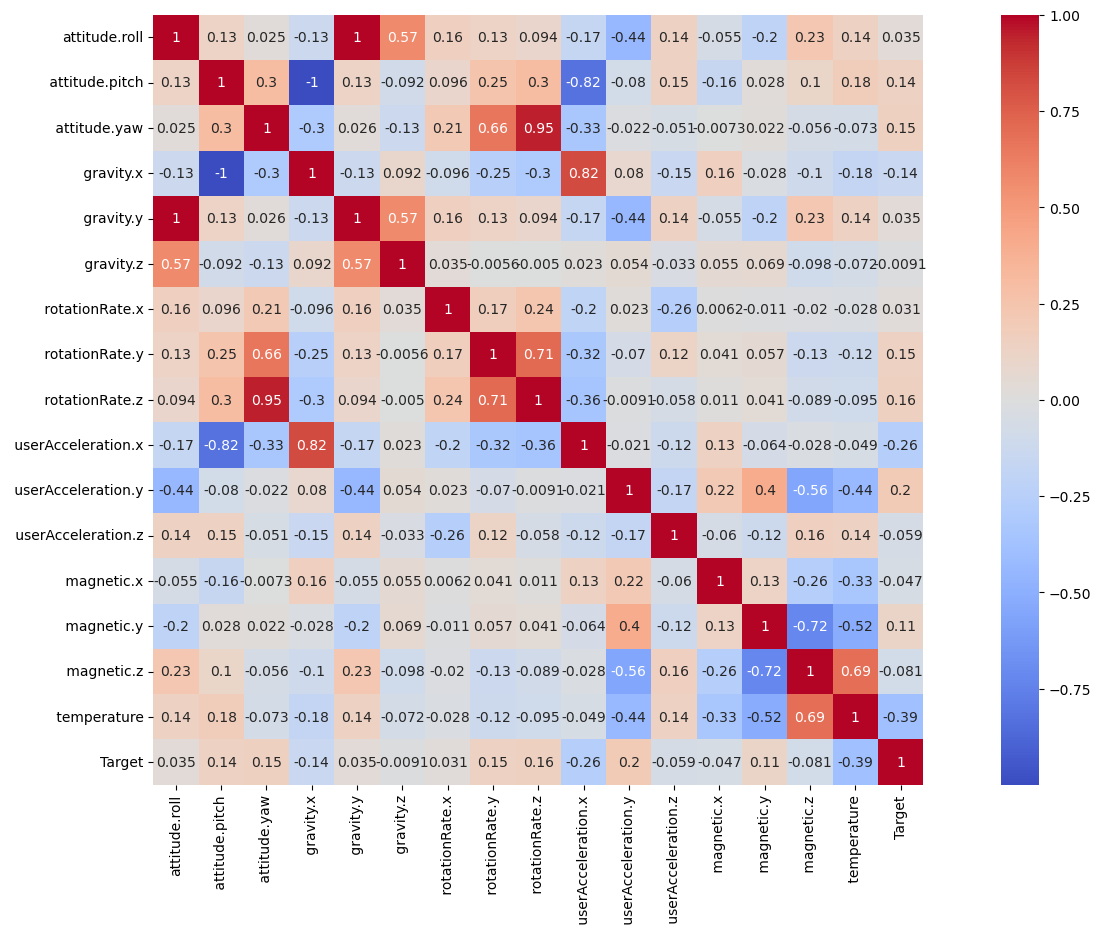

In [17]:
surface_df  = imu_df[(imu_df['Target'] == 0) | (imu_df['Target'] == 1)]

plt.figure(figsize = (20,10))

surface_corr = surface_df.corr()

axis_corr = sns.heatmap(surface_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [18]:
target_corr = surface_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 temperature           0.389989
 userAcceleration.x    0.259052
 userAcceleration.y    0.195587
 rotationRate.z        0.155293
 attitude.yaw          0.150506
 rotationRate.y        0.145416
 gravity.x             0.141066
 attitude.pitch        0.141065
 magnetic.y            0.110242
 magnetic.z            0.080641
 userAcceleration.z    0.059236
 magnetic.x            0.047105
 gravity.y             0.034695
attitude.roll          0.034691
 rotationRate.x        0.030781
 gravity.z             0.009140
Name: Target, dtype: float64
